# 词云生成接口

## url:

    http://121.40.249.2:8000/api/wordcloud/

## 接口参数：

|参数|描述|类型|是否必须| 备注 |
|:-----:|:--------:|:---:|:---:| :--------------------: |
|content|待处理文本|String|是|通过content传递的文本数据大于1M时，接口响应时间比较缓慢（1M文本响应时间约为20s）|
|bg_type|背景图类型|String|否|默认为'tree',暂不支持其他|





## 调用示例：

In [8]:
import requests
import json
url = 'http://121.40.249.2:8000/api/wordcloud/'
data = {'content':u'RapidMiner原名Yale，它是用于数据挖掘、机器学习、商业预测分析的开源计算环境。根据KDnuggets在2011年的一次投票显示，从使用率来看该软件比之R语言还要略胜一筹。因为其具备GUI特性，所以很适合于数据挖掘的初学者入门。RapidMiner提供的数据挖掘和机器学习程序包括：数据加载和转换（ETL），数据预处理和可视化，建模，评估和部署。数据挖掘的流程是以XML文件加以描述，并通过一个图形用户界面显示出来。RapidMiner是由Java编程语言编写的，其中还集成了WEKA的学习器和评估方法，并可以与R语言进行协同工作。'}
response = requests.post(url, data=data)
result = json.loads(response.content)
print(result)

{'code': '000', 'msg': '成功生成词云图', 'pic_path': 'http://121.40.249.2/wordcloud/pic/a155f7f6f04b6ecab2283c59d93ac77a.jpg'}


## 返回参数列表:  

| 参数         | 含义     | 类型     | 说明                                       |      |
| ---------- | ------ | ------ | ---------------------------------------- | ---- |
| code       | 状态码    | string | 000: 成功生成词云<br>001: 未输入文字<br>002: 未知原因无返回结果 |      |
| msg        | 状态描述   | string |                                          |      |
| pic_path | 词云图地址  | string |                   |      |


## 返回示例：

    {
        'code': '000',
        'msg': '成功生成词云图',
        'pic_path': 'http://121.40.249.2/wordcloud/pic/a155f7f6f04b6ecab2283c59d93ac77a.jpg'
    }

# 词云生成源码(读取字符串)

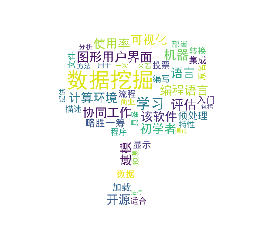

http://121.40.249.2/wordcloud/pic/eeedf715ed38e92c9bd6d700ed98bd98.jpg


In [12]:
import jieba.analyse
from PIL import Image 
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import time
import hashlib

filepath = '/data/wwwroot/default/wordcloud/'
filelink = 'http://121.40.249.2/wordcloud/'

def generater(content, top_k=100, bg_name='tree', color='white', font_type='SimHei'):
    '''
    过滤数字和特殊字符
    '''
    r1 = u'[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'
    content = re.sub(r1, '', content)
    if not content:
        return ''
    '''
    根据TF/IDF提取topK个关键词
    '''
    jieba.analyse.set_stop_words('/data/dict/stopwords_cn.txt')
    tags = jieba.analyse.extract_tags(content, topK=top_k, withWeight=True)
    '''
    得到关键词的词频
    '''
    words_freq = {}
    for tag, n in tags:
        words_freq[tag] = int(n*10000)
    '''
    设置背景
    返回的是 numpy.ndarray 也即 numpy 下的多维数组对象
    '''
    bg_path = filepath+'pic_bg/{}.jpg'.format(bg_name)
    image = Image.open(bg_path)  
    bg_img = np.array(image)  
    '''
    设置字体
    '''
    font_path = filepath+'fonts/{}.ttf'.format(font_type)
    '''
    加载词云库
    '''
    word_cloud = WordCloud(font_path=font_path, # 设置字体
                           background_color=color, # 背景颜色
                           max_words=top_k, # 词云显示的最多词数
                           width=800,
                           height=600,
                           max_font_size=50, # 字体最大
                           mask=bg_img, # 背景图
                           )
    '''
    生成词云
    '''
    word_cloud.generate_from_frequencies(words_freq)
    #显示图片
    plt.imshow(word_cloud)
    plt.axis('off') # 不显示坐标轴
    plt.show()
    # 保存图片
    now_time = str(round(time.time() * 1000))
    pic_name = hashlib.md5(now_time.encode(encoding='UTF-8')).hexdigest()
    word_cloud_img = filepath+'pic/{}.jpg'.format(pic_name)
    word_cloud.to_file(word_cloud_img)
    print(filelink+'pic/{}.jpg'.format(pic_name))
    return filelink+'pic/{}.jpg'.format(pic_name) 

if __name__ == '__main__':
    generater(content=u'RapidMiner原名Yale，它是用于数据挖掘、机器学习、商业预测分析的开源计算环境。根据KDnuggets在2011年的一次投票显示，从使用率来看该软件比之R语言还要略胜一筹。因为其具备GUI特性，所以很适合于数据挖掘的初学者入门。RapidMiner提供的数据挖掘和机器学习程序包括：数据加载和转换（ETL），数据预处理和可视化，建模，评估和部署。数据挖掘的流程是以XML文件加以描述，并通过一个图形用户界面显示出来。RapidMiner是由Java编程语言编写的，其中还集成了WEKA的学习器和评估方法，并可以与R语言进行协同工作。')


# 词云生成源码（读取文本文件）

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.618 seconds.
Prefix dict has been built succesfully.


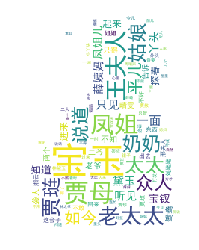

In [2]:
import jieba.analyse
from PIL import Image 
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

filepath = '/data/wwwroot/default/notebook/lessons/1.2NLP/'

def generater(**kwargs):
    content_name = kwargs['content_name']
    content_path = filepath+'{}.txt'.format(content_name)
    top_k = kwargs['top_k']
    bg_name = kwargs['bg_name']
    color = kwargs['color']
    font_type = kwargs['font_type']

    with open(content_path, mode='r', encoding='utf-8') as f:
        content = f.read()
    
    '''
    过滤数字和特殊字符
    '''
    r1 = u'[a-zA-Z0-9’!"#$%&\'()*+,-./:;<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~]+'
    content = re.sub(r1, '', content)
    '''
    根据TF/IDF提取topK个关键词
    '''
    jieba.analyse.set_stop_words('/data/dict/stopwords_cn.txt')
    tags = jieba.analyse.extract_tags(content, topK=top_k, withWeight=True)
    '''
    得到关键词的词频
    '''
    words_freq = {}
    for tag, n in tags:
        words_freq[tag] = int(n*10000)
    '''
    设置背景
    返回的是 numpy.ndarray 也即 numpy 下的多维数组对象
    '''
    bg_path = filepath+bg_name
    image = Image.open(bg_path)  
    bg_img = np.array(image)  
    '''
    设置字体
    '''
    font_path = filepath+'{}.ttf'.format(font_type)
    '''
    加载词云库
    '''
    word_cloud = WordCloud(font_path=font_path, # 设置字体
                           background_color=color, # 背景颜色
                           max_words=top_k, # 词云显示的最多词数
                           width=800,
                           height=600,
                           max_font_size=50, # 字体最大
                           mask=bg_img, # 背景图
                           )
    '''
    生成词云
    '''
    word_cloud.generate_from_frequencies(words_freq)
    #显示图片
    plt.imshow(word_cloud)
    plt.axis('off') # 不显示坐标轴
    plt.show()
    # 保存图片
    word_cloud_img = filepath+'{}_word_cloud.jpg'.format(content_name)
    word_cloud.to_file(word_cloud_img)

if __name__ == '__main__':
    generater(content_name='红楼梦',
              top_k=100,
              bg_name='daiyu5.png',
              color='white',
              font_type='SimHei')